In [17]:
#Import libraries 
import numpy as np
import pandas as pd
from IPython.display import display 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import scipy.stats as stats

In [18]:
df = pd.read_csv('C:/Users/SurendranSelvaraju/Documents/WorkAssign/PreScreen_r320062022/palm_ffb.csv')

In [19]:
#view first 5 rows
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [20]:
#Size of the panda table
df.shape

(130, 9)

In [21]:
#view last 5 rows
df.tail()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91
129,01.10.2018,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04


In [22]:
#Identify null value
df.isnull().sum()*100/len(df)

Date             0.0
SoilMoisture     0.0
Average_Temp     0.0
Min_Temp         0.0
Max_Temp         0.0
Precipitation    0.0
Working_days     0.0
HA_Harvested     0.0
FFB_Yield        0.0
dtype: float64

In [23]:
df.describe() #Summary Statistic of the palm data

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


Using the rule of thumb, 'SoilMoisture','Max_Temp','Precipitation','Working_days' and 'Ha_Haversted' as high standard deviation.

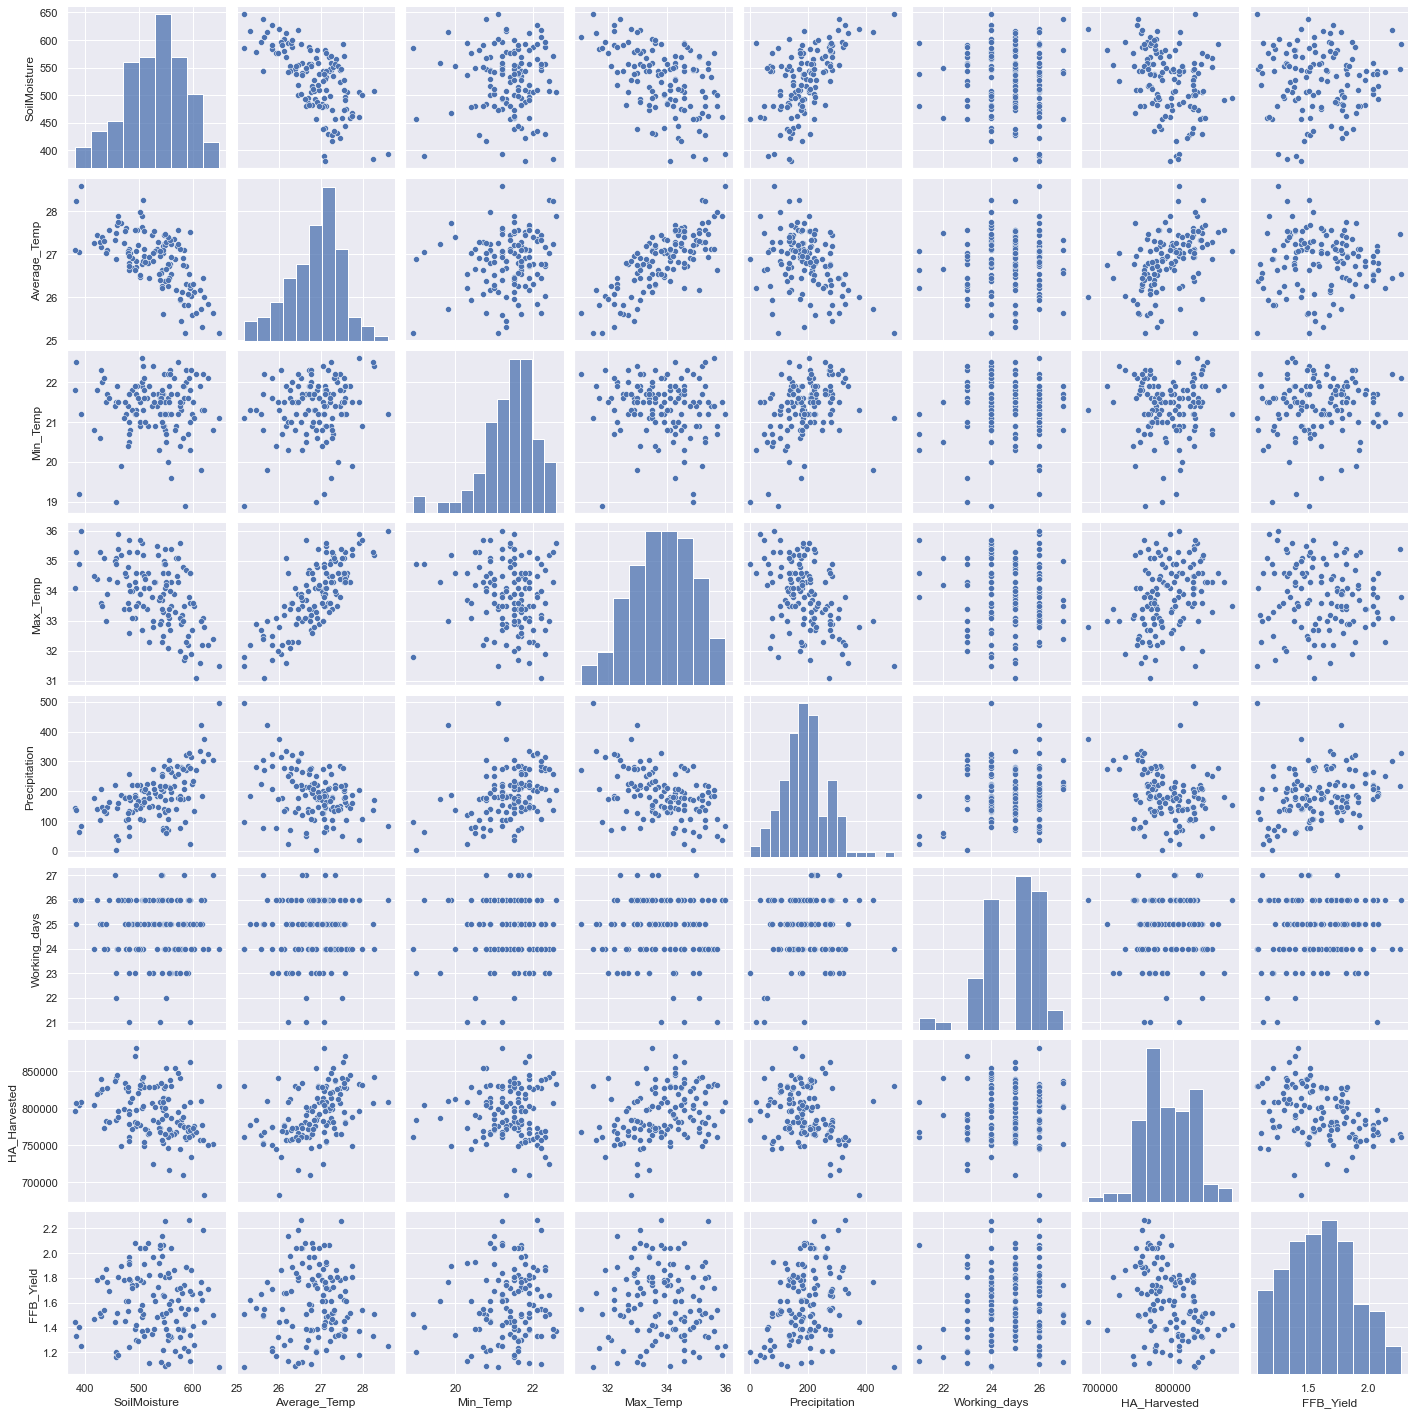

In [24]:
#view the variables relationship using pairplot
sns.pairplot(df)
plt.show()

A positive linear relationship can be observed between FFB Yield and Precipitation feature. As one increases so does the other. On the other hand, FFB yield and HA_Harvested exhibit negative linear relationship. As one increases, and another one decreases.

Text(0.5, 1.0, 'Correlation matrix')

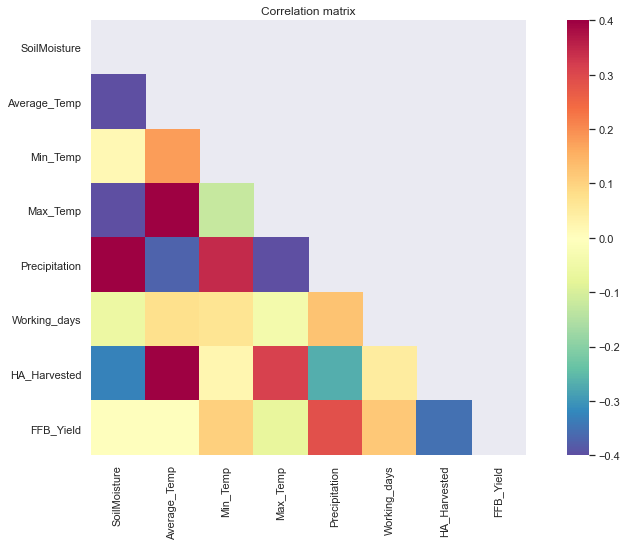

In [25]:
#view the variables relationship in heatmap
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [26]:
# Convert the Data into a correlation matrix
df.corr().round(2) 

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.00,-0.65,0.02,-0.50,0.55,-0.06,-0.33,-0.00
Average_Temp,-0.65,1.00,0.18,0.76,-0.37,0.08,0.45,-0.01
Min_Temp,0.02,0.18,1.00,-0.12,0.35,0.07,0.02,0.10
Max_Temp,-0.50,0.76,-0.12,1.00,-0.46,-0.04,0.31,-0.07
Precipitation,0.55,-0.37,0.35,-0.46,1.00,0.13,-0.27,0.29
Working_days,-0.06,0.08,0.07,-0.04,0.13,1.00,0.05,0.12
HA_Harvested,-0.33,0.45,0.02,0.31,-0.27,0.05,1.00,-0.35
FFB_Yield,-0.00,-0.01,0.10,-0.07,0.29,0.12,-0.35,1.00


• Warm colors (red) in heatmap indicate a positive correlation, cool colors (blue) indicate a negative correlation.

• FFB_Yield has strong negative correlation with HA_Harvested

• FFB_Yield has strong positive correlation with Precipitation

• FFB_Yield has strong moderate correlation with Working days

• FFB_Yield has weaker positive correlation with Max_Temp and Min_Temp

In [28]:
# we can further investigate the relationship between independent and dependent variables using parametric test (Pearson correlation)

#Ho: There is no relationship between column[i] and FFB_Yield
#H1: There is a relationship between column[i] and FFB_Yield


X = df.drop(['FFB_Yield','Date'],axis=1)
alpha = 0.05
#for this example we will use the Pearson Correlation.
for i in X.columns:
    print([i])
    pearson_coef, p_value = stats.pearsonr(df[i], df['FFB_Yield'])
    print(pearson_coef, p_value)
    if p_value < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['SoilMoisture']
-0.003182901354288907 0.9713300051590029
The null hypothesis cannot be rejected
['Average_Temp']
-0.005494352923598588 0.95053043130921
The null hypothesis cannot be rejected
['Min_Temp']
0.10382969410528088 0.2397598314510036
The null hypothesis cannot be rejected
['Max_Temp']
-0.07120090454850744 0.42082145429981255
The null hypothesis cannot be rejected
['Precipitation']
0.2896037241228685 0.0008317241812972529
The null hypothesis can be rejected
['Working_days']
0.11636407232753454 0.18736169506155137
The null hypothesis cannot be rejected
['HA_Harvested']
-0.3502218383833432 4.413086896894055e-05
The null hypothesis can be rejected


The result produce by Pearson Correlation it is differ from the heatmap and correlation matrix. In this calculation it shows that there is significant relationship between 'Precipitation' and 'HA_Haversted' with 'FFB_Yield'. It is suggesting that other factors have no significant relationship with 'FFB_Yield', which is not entirely true. This is where the domain knowledge need to be used to verify the produced statistic result. It can be statistically true but not applicable for a real world problem.

# Using Exhaustive Feature Selector to select the best all possible feature combinations

In [29]:
X = df.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = df.FFB_Yield    #target column i.e FFB_Yield

In [30]:

emodel=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)

emodel.fit(X,y)

Features: 127/127

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(), max_features=7,
                          n_jobs=-1, scoring='r2')

In [31]:
emodel.best_idx_


(0, 2, 4, 6)

In [32]:
X.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'HA_Harvested'], dtype='object')

#  Using XGBRessor to fit the model and see importance features

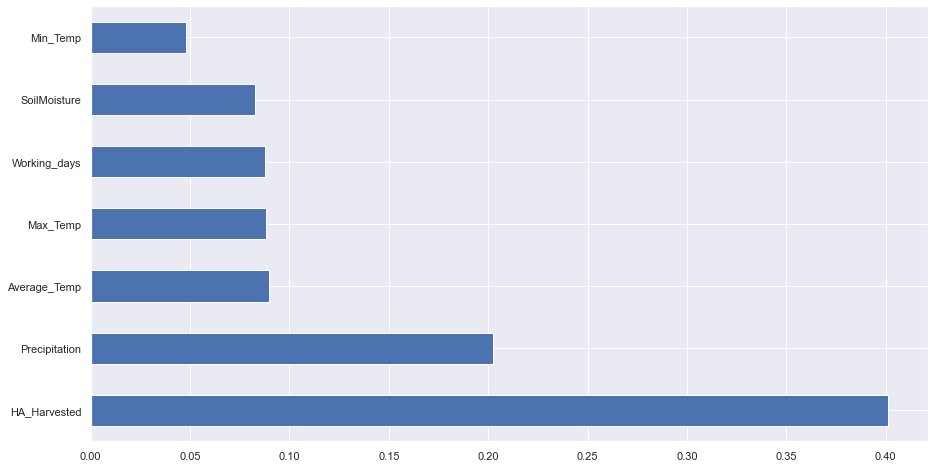

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [33]:
xgb = XGBRegressor()
xgb.fit(X, y)
F_imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
F_imp = F_imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(F_imp)

# Using Random Forest to fit the model and see importance features

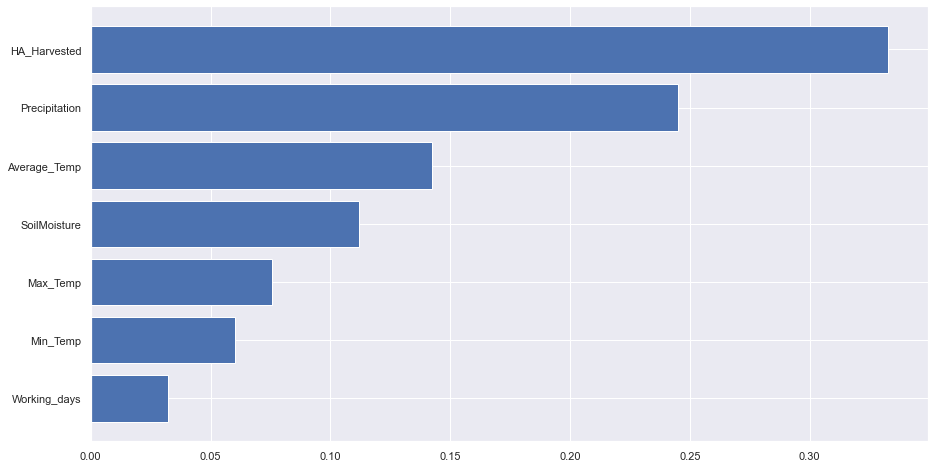

In [34]:
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])